In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv
/kaggle/input/icr-identify-age-related-conditions/greeks.csv
/kaggle/input/icr-identify-age-related-conditions/train.csv
/kaggle/input/icr-identify-age-related-conditions/test.csv


# Necessary Imports

In [2]:
# General Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Preprocessing And Analysis

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Classifiers

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

# Model Selection

from sklearn.model_selection import train_test_split

# Extra

from tensorflow.nn import softmax

# Pipelines

from sklearn.pipeline import Pipeline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading Data

In [3]:
train = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
test = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')
sample = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv')
greeks = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv')

# Preliminary Analysis

In [4]:
train.columns

Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

# Preprocessing

In [6]:
X = train.drop(['Class','Id'],axis=1)
X['EJ'].replace(to_replace=['A','B'],value=[0,1],inplace=True)
X = X.astype(float)
y = train['Class']

In [7]:
test_id = test['Id']
test = test.drop(['Id'],axis=1)
test['EJ'].replace(to_replace=['A','B'],value=[0,1],inplace=True)
test = test.astype(float)

In [8]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.set_output(transform='pandas')
X = imputer.fit_transform(X)
test = imputer.transform(test)

# Corr Heatmap

<AxesSubplot: >

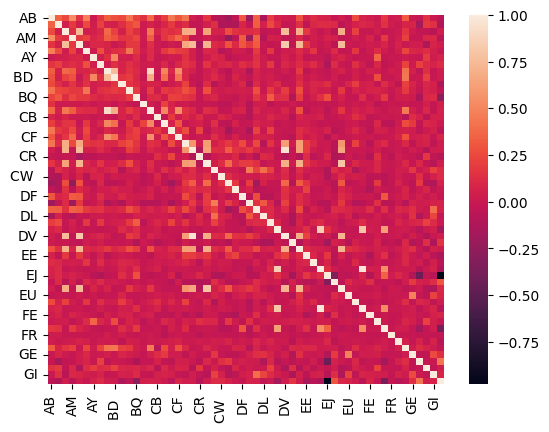

In [9]:
sns.heatmap(X.corr())

# PCA

In [10]:
pca = PCA()
pca.fit(X)
pca.explained_variance_ratio_.round(2) * 100

array([64., 22., 10.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.])

# Model Selection And Validation

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

# Classifiers

In [12]:
logreg = LogisticRegression()
rfc = RandomForestClassifier()
dtree = DecisionTreeClassifier()
svc = SVC(probability=True)
knn = KNeighborsClassifier()

In [13]:
logreg.fit(X_train,y_train)
print(logreg.score(X_train,y_train),logreg.score(X_test,y_test))

0.8539553752535497 0.9032258064516129


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.9112903225806451

In [15]:
svc.fit(X_train,y_train)
print(svc.score(X_train,y_train),svc.score(X_test,y_test))

0.8336713995943205 0.8951612903225806


In [16]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print(knn.score(X_train,y_train),knn.score(X_test,y_test))

0.845841784989858 0.8387096774193549


In [17]:
answer = rfc.predict_proba(test)

In [18]:
answer

array([[0.55, 0.45],
       [0.55, 0.45],
       [0.55, 0.45],
       [0.55, 0.45],
       [0.55, 0.45]])

In [19]:
sample

,Id,class_0,class_1
0,00eed32682bb,0.5,0.5
1,010ebe33f668,0.5,0.5
2,02fa521e1838,0.5,0.5
3,040e15f562a2,0.5,0.5
4,046e85c7cc7f,0.5,0.5


In [20]:
sub = pd.DataFrame({'Id':test_id,'class_0': answer[:,0],'class_1': answer[:,1]})
sub.to_csv('submission.csv',index=False)